# **EDA - MLOps**

En esta sección, se llevará a cabo un Análisis Exploratorio de Datos (EDA) sobre el conjunto de datos resultante del proceso de Extracción, Transformación y Carga (ETL). El objetivo principal de este análisis es identificar patrones, tendencias y variables relevantes que servirán como base para la construcción de un modelo preciso de Machine Learning, destinado a la recomendación de películas. A través del EDA, buscaremos comprender en profundidad la naturaleza de los datos, detectar posibles relaciones entre variables clave y descubrir características significativas. Este conocimiento inicial no solo orientará la formulación del modelo de Machine Learning, sino que también permitirá abordar la selección adecuada de atributos, la detección de posibles desafíos en los datos y la definición de estrategias efectivas para el procesamiento futuro.

# **1. Importamos librerias y cargamos el dataset**

In [80]:
#Importamos librerias
#Para análisis de datos
import pandas as pd
import numpy as np 
#Para graficos 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [81]:
#Carga de dataset
movies = pd.read_csv("movies_final.csv")

# **2. Exploración Inicial del dataset**

2.1 Visualización de datos 

In [82]:
#Modificamos la cantidad de columnas mostradas para poder visualizar todas
pd.set_option('display.max_columns', 24)

In [83]:
#Visualización de los primeros datos
movies.head(5)

,id,title,genre,collection,original_language,spoken_language,runtime,release_date,release_year,director_name,companies,production_countrie,status,overview,popularity,vote_average,vote_count,budget,revenue,return,tagline
0,862,Toy Story,"Animation, Comedy, Family",Toy Story Collection,en,English,81.0,1995-10-30,1995,John Lasseter,Pixar Animation Studios,United States of America,Released,"Led by Woody, Andy's toys live happily in his ...",21.946943,7.7,5415.0,30000000.0,373554033.0,12.451801,NaN
1,8844,Jumanji,"Adventure, Fantasy, Family",None,en,"English, Français",104.0,1995-12-15,1995,Joe Johnston,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,Released,When siblings Judy and Peter discover an encha...,17.015539,6.9,2413.0,65000000.0,262797249.0,4.043035,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,"Romance, Comedy",Grumpy Old Men Collection,en,English,101.0,1995-12-22,1995,Howard Deutch,"Warner Bros., Lancaster Gate",United States of America,Released,A family wedding reignites the ancient feud be...,11.712900,6.5,92.0,0.0,0.0,0.000000,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Comedy, Drama, Romance",None,en,English,127.0,1995-12-22,1995,Forest Whitaker,Twentieth Century Fox Film Corporation,United States of America,Released,"Cheated on, mistreated and stepped on, the wom...",3.859495,6.1,34.0,16000000.0,81452156.0,5.090760,Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Comedy,Father of the Bride Collection,en,English,106.0,1995-02-10,1995,Charles Shyer,"Sandollar Productions, Touchstone Pictures",United States of America,Released,Just when George Banks has recovered from his ...,8.387519,5.7,173.0,0.0,76578911.0,0.000000,Just When His World Is Back To Normal... He's ...


In [84]:
movies.sample(5)

,id,title,genre,collection,original_language,spoken_language,runtime,release_date,release_year,director_name,companies,production_countrie,status,overview,popularity,vote_average,vote_count,budget,revenue,return,tagline
30628,19342,All in,"Comedy, Drama",None,en,English,98.0,2006-03-14,2006,Nick Vallelonga,None,United States of America,Released,Six medical students with unique talents pool ...,1.098447,4.5,3.0,0.0,0.0,0.000000,NaN
45056,444902,Dirty Dancing,"Music, Drama, Romance, TV Movie",None,en,English,130.0,2017-05-24,2017,Wayne Blair,Lionsgate Television,United States of America,Released,Spending the summer at a Catskills resort with...,11.145052,5.3,58.0,0.0,0.0,0.000000,A musical re-imagining
32216,331251,Twenty,"Comedy, Drama",None,ko,한국어/조선말,115.0,2015-03-25,2015,Lee Byeong-heon,Next Entertainment World,South Korea,Released,A story about three friends who just turned tw...,1.786845,6.9,33.0,0.0,0.0,0.000000,OUR ROARING BUT EMBARRASSING TWENTIES
12641,13243,Meet Bill,"Comedy, Drama, Romance",None,en,English,97.0,2007-09-07,2007,Bernie Goldmann,"Greenestreet Films, Eclipse Catering",United States of America,Released,A mild-mannered bank executive (Aaron Eckhart)...,6.226054,5.9,89.0,5000000.0,346592.0,0.069318,A comedy about someone you know.
15770,98636,Kisses,Drama,None,ja,日本語,74.0,1957-07-23,1957,Yasuzô Masumura,None,Japan,Released,Kinichi and Akiko meet when they visit their f...,0.617028,5.8,7.0,0.0,0.0,0.000000,NaN


- En primera vista se puede observar los datos string concatenados producto de la desanidación del ETL de los cuales "género" puede ser importante evalular, a su vez la columna overview cuenta con descripciones de las peliculas y con los titulos pueden ayudar a formar nubes de palabras. 


2.2 Información sobre los tipos de datos y valores no nulos

In [85]:
#Tipo de datos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45451 non-null  int64  
 1   title                45451 non-null  object 
 2   genre                45451 non-null  object 
 3   collection           45451 non-null  object 
 4   original_language    45440 non-null  object 
 5   spoken_language      45451 non-null  object 
 6   runtime              45205 non-null  float64
 7   release_date         45451 non-null  object 
 8   release_year         45451 non-null  int64  
 9   director_name        44617 non-null  object 
 10  companies            45451 non-null  object 
 11  production_countrie  45451 non-null  object 
 12  status               45371 non-null  object 
 13  overview             44510 non-null  object 
 14  popularity           45451 non-null  float64
 15  vote_average         45451 non-null 

In [86]:
#valores nulos
print(movies.isnull().sum())

id                         0
title                      0
genre                      0
collection                 0
original_language         11
spoken_language            0
runtime                  246
release_date               0
release_year               0
director_name            834
companies                  0
production_countrie        0
status                    80
overview                 941
popularity                 0
vote_average               0
vote_count                 0
budget                     0
revenue                    0
return                     0
tagline                25026
dtype: int64


- Se tiene 45451 entradas y 21 columnas, donde 12 variables son type object, y 9 númericas de las cuales 7 son float y 2 int. 
- Las columnas con valores nulos son original_language, runtime, director_name, status, overview y tagline.


# **3. Análisis univariable**

In [87]:
nombres_columnas = movies.columns.tolist()
print(nombres_columnas)

['id', 'title', 'genre', 'collection', 'original_language', 'spoken_language', 'runtime', 'release_date', 'release_year', 'director_name', 'companies', 'production_countrie', 'status', 'overview', 'popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'return', 'tagline']


**3.1 Análisis univariable**
- Para el análisis no se evaluaran todas las variables y se tomaran a criterio personal teniendo en cuenta un posterior modelamiento aquellas columnas que puedan aportar un insigth o valor de interes. 

**Title:**

In [88]:
# Se realizará una nube de palabras para examinar aquellas palabras más representativas
# Concatenar los títulos en un solo texto
text = ' '.join(title for title in movies.title)

# Crear un objeto WordCloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

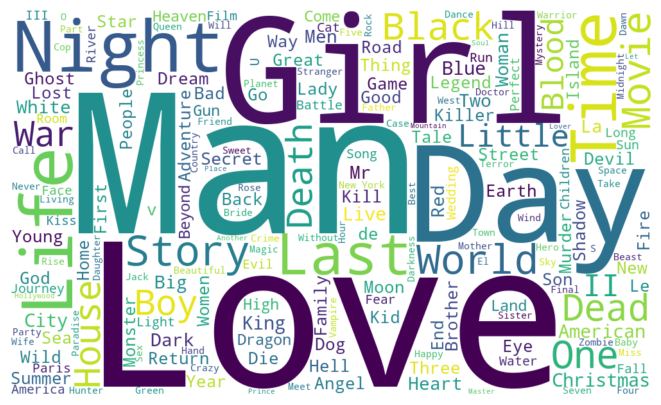

In [89]:
# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Se puede observar que las palabras más comunes en los titulos de las peliculas son: Love, Girl, Man, Day, Life, Night y Time. Esto nos indica que existe una potencialidad a que las peliculas giren en torno a temas relacionales, romanticos, dramas o comedias. Esto se profundizará en el analisis de los géneros. 
- Para el desarrollo del modelo se puede esperar que las recomendaciones más comunes giren en torno a estas tematicas. 

**Géneros**

In [90]:
#Se realizará una visualización del conteo de los géneros más comunes de las peliculas
# Dividir los géneros en una lista
movies['genres_list'] = movies['genre'].str.split(', ')

# Crear filas individuales por género
genres_count = movies['genres_list'].explode().value_counts()

# Convertir a DataFrame para una mejor manipulación
genres_df = genres_count.reset_index()
genres_df.columns = ['Genero', 'Count']

#Borramos la columna generada en movies
movies.drop(columns= 'genres_list', inplace= True)

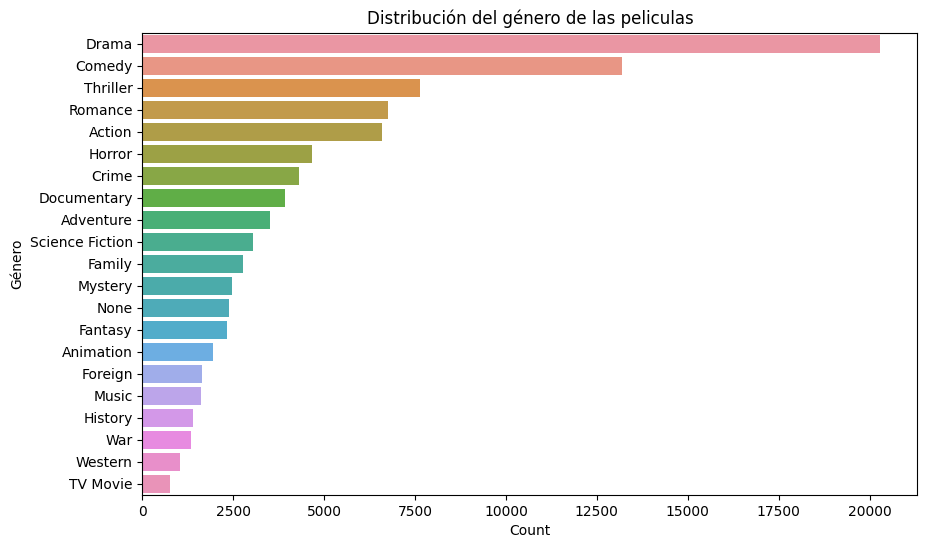

In [91]:
# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genero', data=genres_df, orient='h')
plt.xlabel('Count')
plt.ylabel('Género')
plt.title('Distribución del género de las peliculas')
plt.show()

- Se puede apreciar que los géneros más comunes en el dataset de peliculas son: Drama, Comedy, Thriller, Romance y Action. 
- Esto confirma la suposición realizada en el análisis de la variable "title", en torno a las temáticas de las peliculas y sobre que podría estar sesgado el modelo de usar la variable género.  

**Collection o Franquicia**

Número total de franquicias: 1695


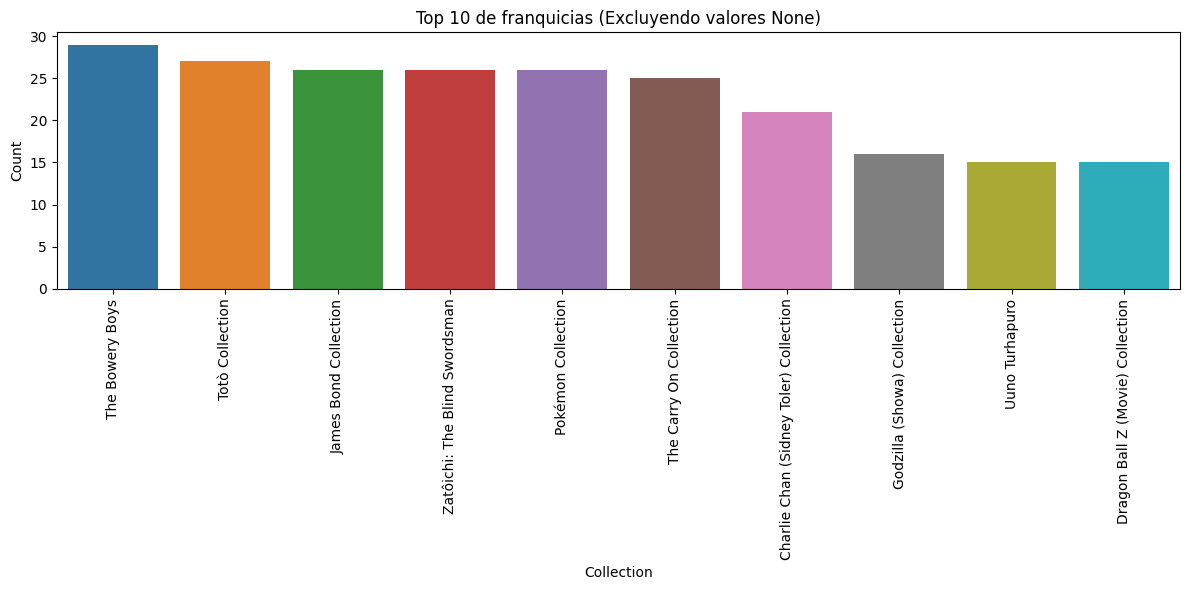

In [92]:
#Se busca determinar 
#Mascara conteo
mask = movies[movies['collection']!= 'None']

#Aplicación de mascara y conteo de franquicias totales en el dataset
conteo_franquicia = mask.collection.value_counts()

# Seleccionar los 10 mayores
top_10 = conteo_franquicia.nlargest(10)

# Imprimir el número total de franquicias
total = len(conteo_franquicia)
print(f"Número total de franquicias: {total}")

#Visualizamos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=90)
plt.xlabel('Collection')
plt.ylabel('Count')
plt.title('Top 10 de franquicias (Excluyendo valores None)')
plt.tight_layout()
plt.show()

- En total el dataset tiene 1695 franquicias.
- Se puede visualizar las 10 franquicias con más numeros de peliculas en el dataset, donde las tres primeras son las colecciones de "The Bowery Boys", "Toto Collection" y "James Bond Collection".

**Overview o Resumen de la pelicula**

- Al igual que la columna "title" se analizará las palabras más comunes para determinar la tendencia en la tematica. Para esto primero se creará una mascara para filtrar los valores NaN

In [93]:
#Creación de mascara
mask_overview = ~movies['overview'].isna()
mask = movies[mask_overview]

In [94]:
# Concatenar las review en un solo texto
texto_overview = ' '.join(title for title in mask.overview)

# Crear un objeto WordCloud
wordcloud_overview = WordCloud(width=1000, height=600, background_color='white').generate(texto_overview)

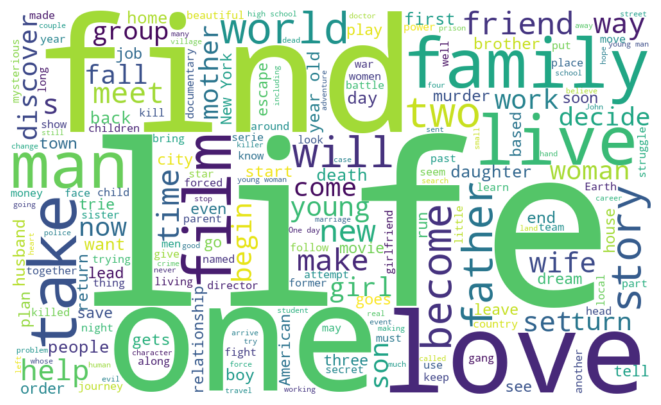

In [95]:
# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis('off')
plt.show()

- El resultado muestra similitudes en las palabras y las tematicas mostradas en el análisis de title. 

**Año de lanzamiento**

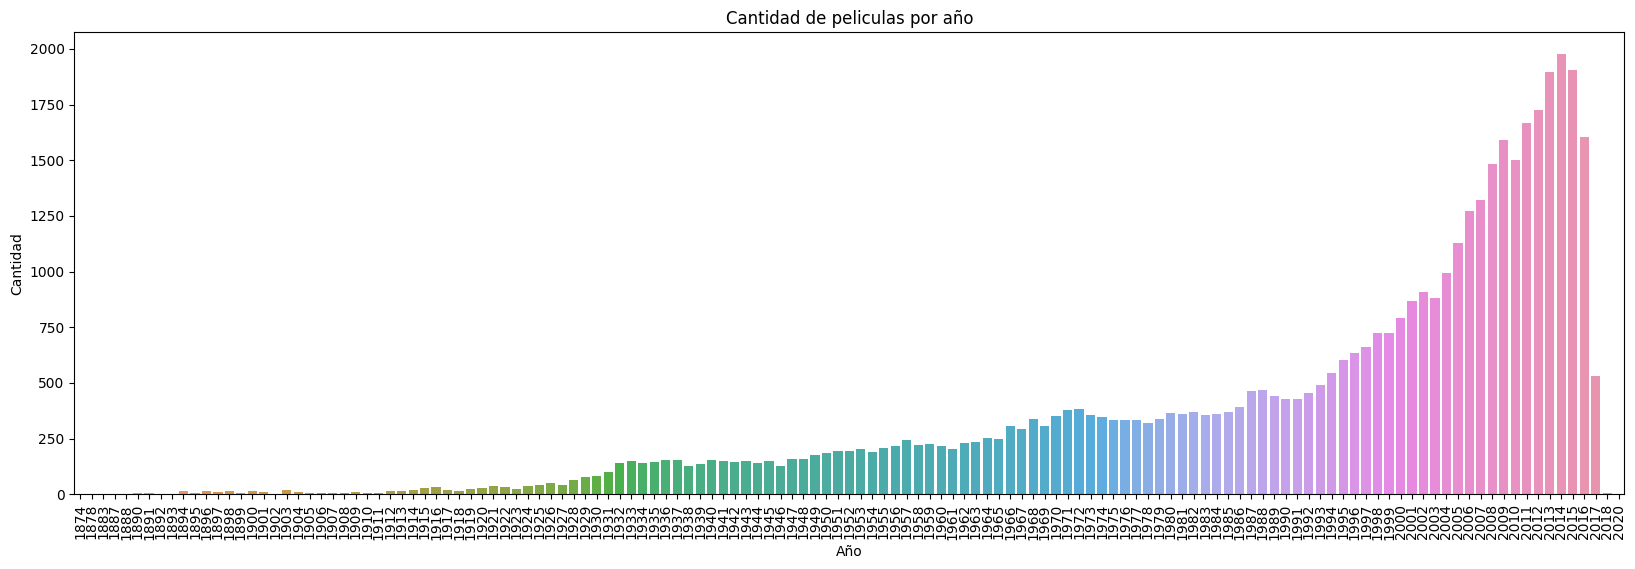

In [96]:
#Se hará un ploteo para mostrar la cantidad de peliculas y su crecimiento 
plt.figure(figsize=(20, 6))
sns.countplot(data=movies, x='release_year')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de peliculas por año')
plt.xticks(rotation=90)
plt.show()

- El dataset contiene peliculas desde 1874 hasta el 2020, se revisará como ejemplo la pelicula más antigua para determinar si brinda información relevante

In [97]:
mask = movies[movies['release_year'] == 1874]

In [98]:
mask

,id,title,genre,collection,original_language,spoken_language,runtime,release_date,release_year,director_name,companies,production_countrie,status,overview,popularity,vote_average,vote_count,budget,revenue,return,tagline
34978,315946,Passage of Venus,Documentary,None,xx,No Language,1.0,1874-12-09,1874,P.J.C. Janssen,None,France,Released,Photo sequence of the rare transit of Venus ov...,0.480371,6.0,19.0,0.0,0.0,0.0,NaN


- Debido a que la mayoria de sus campos se encuentran con valores y la pelicula documental realmente existe, no se tratará estos outliers. Sin embargo para el sistema de recomendación se tomará peliculas más actuales, debido a la disponibilidad para ser consumidas, ya que no se desea recomendar peliculas que muy dificilmente puedan ser encontradas. 

**Resumen estadistico de las variables númericas**

- Para el análisis univariado de las variables númericas primero se mostrará las estadisticas descriptivas de las mismas

In [99]:
#Para ello se usara la función describe() y por motivos de visualización se transpondra la matriz
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45451.0,1.079846e+05,1.121113e+05,2.0,26367.500000,59871.000000,156327.50000,4.691720e+05
runtime,45205.0,9.418190e+01,3.832950e+01,0.0,85.000000,95.000000,107.00000,1.256000e+03
release_year,45451.0,1.991882e+03,2.405773e+01,1874.0,1978.000000,2001.000000,2010.00000,2.020000e+03
popularity,45451.0,2.926887e+00,6.006458e+00,0.0,0.389095,1.131386,3.69437,5.474883e+02
vote_average,45451.0,5.624085e+00,1.915424e+00,0.0,5.000000,6.000000,6.80000,1.000000e+01
vote_count,45451.0,1.099897e+02,4.913523e+02,0.0,3.000000,10.000000,34.00000,1.407500e+04
budget,45451.0,4.231294e+06,1.742942e+07,0.0,0.000000,0.000000,0.00000,3.800000e+08
revenue,45451.0,1.121930e+07,6.433984e+07,0.0,0.000000,0.000000,0.00000,2.787965e+09
return,45451.0,6.589542e+02,7.463165e+04,0.0,0.000000,0.000000,0.00000,1.239638e+07


- En las columnas Budget, revenue y return se puede observar que la gran mayoria de los datos son 0. Esto se muestra es la distribución de los datos al 25, 50 y 75%. 
- La cantidad de 0 en estas 3 variables hace evidente la falta de necesidad de hacer gráficos de distribución, puesto que la concentración de los datos estará en este valor. Sin embargo, se hará un box-plot para visualizar los outliers.
- Vote_avarage es la columna con menor desviación estandar lo que nos indica que sus valores no estan tan alejados de la media como en el resto de variables. Lo cual la hace interesante para ser visualizada.


**Análisis de graficos**

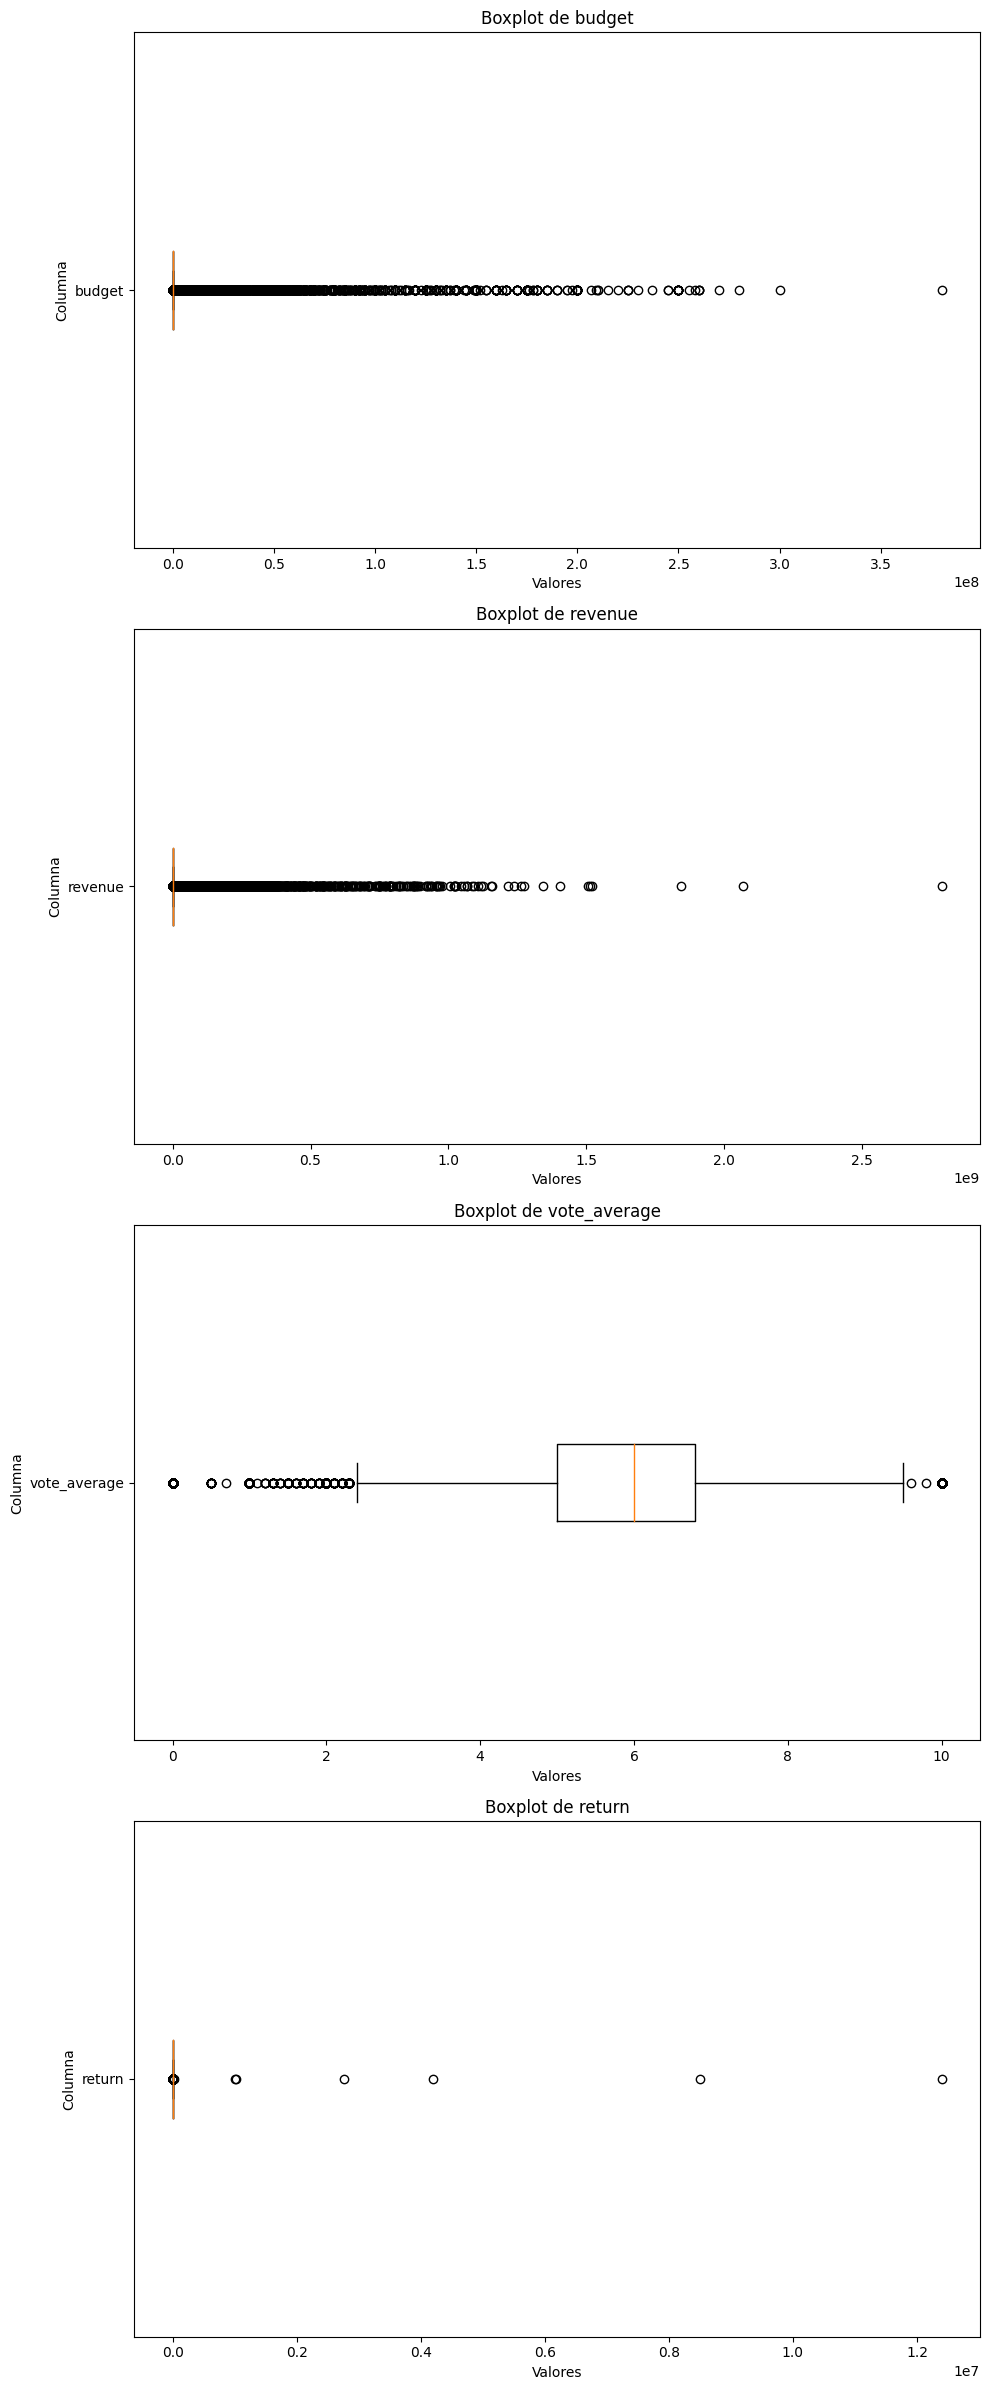

In [100]:
# Armamos una lista con las columnas a considerar
columnas = ["budget", "revenue","vote_average", "return"]

# Crear una figura y un conjunto de ejes para cada variable
fig, axs = plt.subplots(len(columnas), figsize=(10, 6 * len(columnas)))

# Generar un boxplot para cada variable
for i, variable in enumerate(columnas):
    ax = axs[i] if len(columnas) > 1 else axs  # usar un solo eje si solo hay una variable

    # Crear el boxplot para la variable actual
    box_plot = ax.boxplot(movies[variable], vert=False)

    # Configurar los ejes y el título del gráfico
    ax.set_yticklabels([variable])
    ax.set_xlabel('Valores')
    ax.set_ylabel('Columna')
    ax.set_title(f'Boxplot de {variable}')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Se puede observar que efectivamente en las columnas budget, revenue y return concentran sus valores en el valor 0, y que tienen presencia de outliers. No aportan información relevante que puedan servir para un posterior modelamiento. 
- La columna vote avarage, presenta datos que se agrupan en su mayoria por debajo de la media, presentando muchos datos atipicos. 

**Valor atipico de budget**

In [101]:
#Se crea mascara para visualizar cual es la pelicula con el budget más alto (valor atipico)
bud = movies[movies['budget'] == 380000000]
bud

,id,title,genre,collection,original_language,spoken_language,runtime,release_date,release_year,director_name,companies,production_countrie,status,overview,popularity,vote_average,vote_count,budget,revenue,return,tagline
17184,1865,Pirates of the Caribbean: On Stranger Tides,"Adventure, Action, Fantasy",Pirates of the Caribbean Collection,en,"English, Español",136.0,2011-05-14,2011,Rob Marshall,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,Released,Captain Jack Sparrow crosses paths with a woma...,27.88772,6.4,5068.0,380000000.0,1.045714e+09,2.751878,Live Forever Or Die Trying.


- Directamente estos valores atipicos en las columnas Budget, Revenue y Return no serán tratados puesto que estas columnas no serán usadas para el modelamiento, y los valores que contienen en el resto de columnas son relevantes.

**Vote Average**

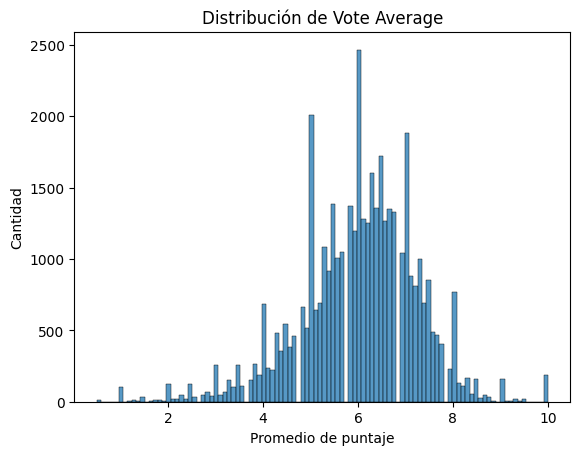

In [103]:
#Filtramos los valores 0
mask_vote = movies['vote_average'] > 0
mask = movies[mask_vote]

#Graficamos vote average para una mejor visualización de su distribución 
sns.histplot(mask['vote_average'])
plt.xlabel('Promedio de puntaje')
plt.ylabel('Cantidad')
plt.title('Distribución de Vote Average')
plt.show()

- Para la elaboración del gráfico se decidio crear una mascara para los valores mayores a 0, de esta manera se puede observar una distribución con una dispersión baja y que agrupa muchos de sus datos alrededor de la media que es 5.42. 
- Esta variable puede ser considerada para el modelamiento. 

# **4. Análisis bivariable y multivariable**

**Correlación de variables númericas**

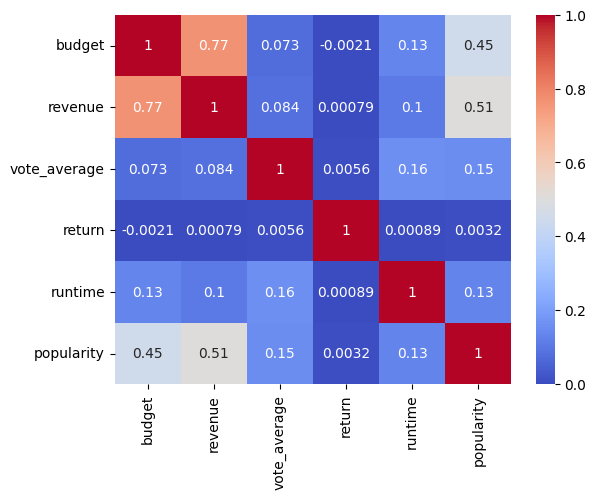

In [105]:
# Filtramos
variables = ["budget", "revenue","vote_average", "return", "runtime", "popularity"]
df = movies[variables]
# Graficamos 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

- Se puede apreciar que la mayoria de variables númericas tienen una correlación muy baja. 
- Budget y Revenue cuentan con la mayor correlación, lo cual puede ser explicado en que mayor presupuesto, en este caso inversión puede representar una mayor recaudación.

**Exploración Bivariado**
- Se analizará las relaciones de las variables que tienen mayor correlación para ver si se pueden explicar. 

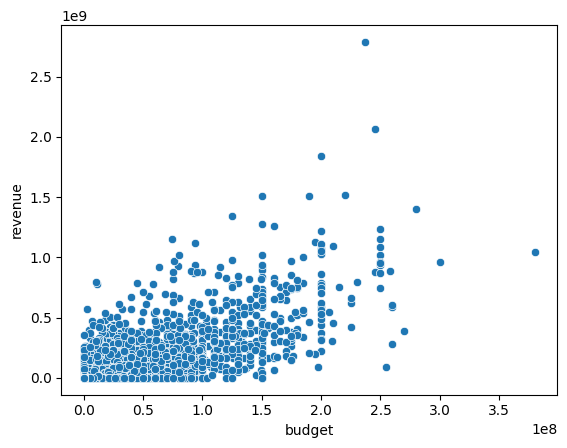

In [106]:
# Relación entre 'revenue' y 'budget'
sns.scatterplot(x='budget', y='revenue', data=df)
plt.show()

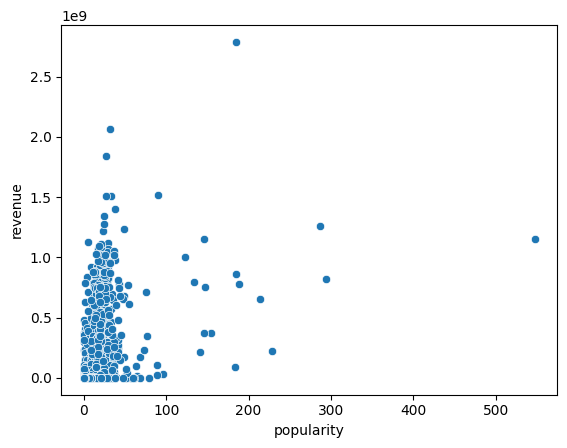

In [110]:
# Relación entre 'revenue' y 'budget'
sns.scatterplot(x='popularity', y='revenue', data=df)
plt.show()

- Budget y Revenue, parecen tener una tendencia a relacionarse, sin embargo esta tendencia no se encuentra muy marcada debido a la cantidad de valores 0 y los outliers. 
- Revenue y popularity tampoco parecen mostrar una tendencia.